In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [78]:
train_data_model1 = pd.read_csv('avgword2vec_cbow.csv')

In [79]:
train_data_model2 = pd.read_csv('avgword2vec_sg.csv')

In [80]:
train_data_model1.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'train_id'], inplace=True)
train_data_model2.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'train_id'], inplace=True)


In [81]:
from sklearn.model_selection import train_test_split


data_m1 = train_data_model1.copy()

y = data_m1['price']
X = data_m1.drop(columns=['price'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train_m1 = X_train[:10000]
y_train_m1 = y_train[:10000]
X_test_m1 = X_test[:3500]
y_test_m1 = y_test[:3500]

In [82]:
data_m2 = train_data_model2.copy()

y = data_m2['price']
X = data_m2.drop(columns=['price'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train_m2 = X_train[:10000]
y_train_m2 = y_train[:10000]
X_test_m2 = X_test[:3500]
y_test_m2 = y_test[:3500]

In [83]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=175)
X_K_train_m1 = kpca.fit_transform(X_train_m1)
X_K_test_m1 = kpca.transform(X_test_m1)

X_K_train_m2 = kpca.fit_transform(X_train_m2)
X_K_test_m2 = kpca.transform(X_test_m2)

In [108]:
import pickle

# Load the MLP model from file
filename = 'manual_pre_cbow.pkl'
with open(filename, 'rb') as file:
    model1 = pickle.load(file)


C:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator MLPRegressor from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [109]:
import pickle

# Load the MLP model from file
filename = 'manual_post_cbow.pkl'
with open(filename, 'rb') as file:
    model2 = pickle.load(file)


In [110]:
import pickle

# Load the MLP model from file
filename = 'manual_pre_sg.pkl'
with open(filename, 'rb') as file:
    model3 = pickle.load(file)


In [111]:
import pickle

# Load the MLP model from file
filename = 'manual_post_sg.pkl'
with open(filename, 'rb') as file:
    model4 = pickle.load(file)


In [112]:
y1 = model1.predict(X_K_test_m1)
y2 = model2.predict(X_K_test_m1)
y3 = model3.predict(X_K_test_m2)
y4 = model4.predict(X_K_test_m2)

In [113]:
plt.rcParams['lines.linewidth'] = 3

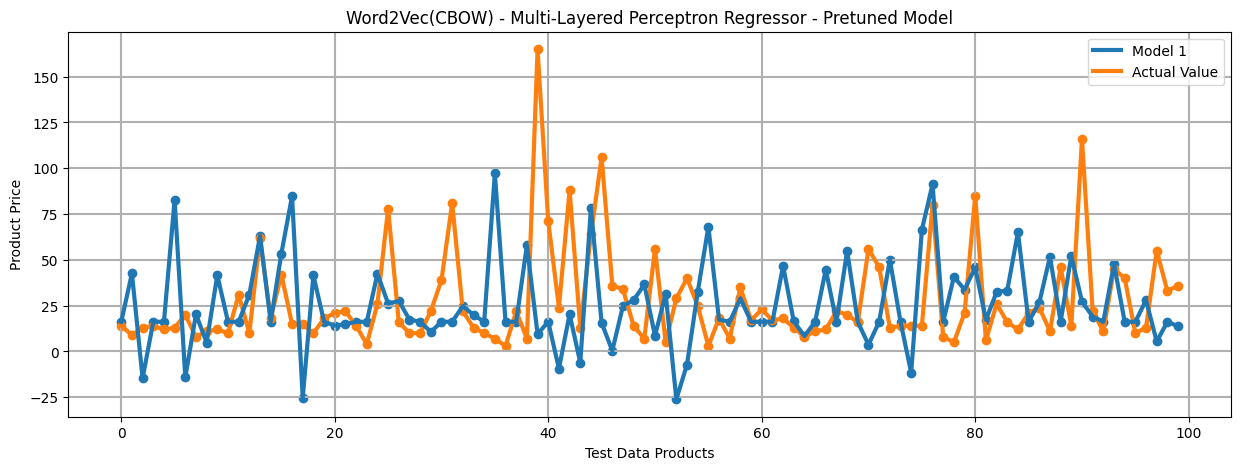

In [123]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

plt.grid(True, linewidth=1.5, which='both')
x= [i for i in range(100)]
plt.scatter(x, y1[:100])
plt.scatter(x, y_test_m1[:100])
plt.plot(x, y1[:100], label='Model 1', zorder=3)
plt.plot(x, y_test_m1[:100], label='Actual Value', zorder=2)
# Customize the plot
plt.title("Word2Vec(CBOW) - Multi-Layered Perceptron Regressor - Pretuned Model")
plt.xlabel("Test Data Products")
plt.ylabel("Product Price")
plt.legend()

# Display the plot
plt.show()


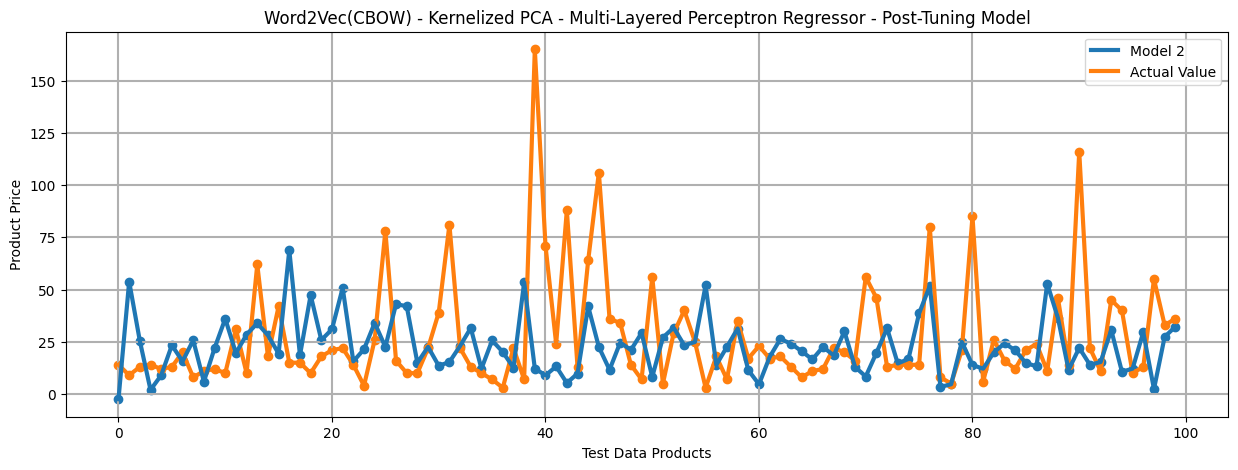

In [124]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

plt.grid(True, linewidth=1.5, which='both')
x= [i for i in range(100)]
plt.scatter(x, y2[:100])
plt.scatter(x, y_test_m1[:100])
plt.plot(x, y2[:100], label='Model 2', zorder=3)
plt.plot(x, y_test_m1[:100], label='Actual Value')

# Customize the plot
plt.title("Word2Vec(CBOW) - Kernelized PCA - Multi-Layered Perceptron Regressor - Post-Tuning Model")
plt.xlabel("Test Data Products")
plt.ylabel("Product Price")
plt.legend()

# Display the plot
plt.show()


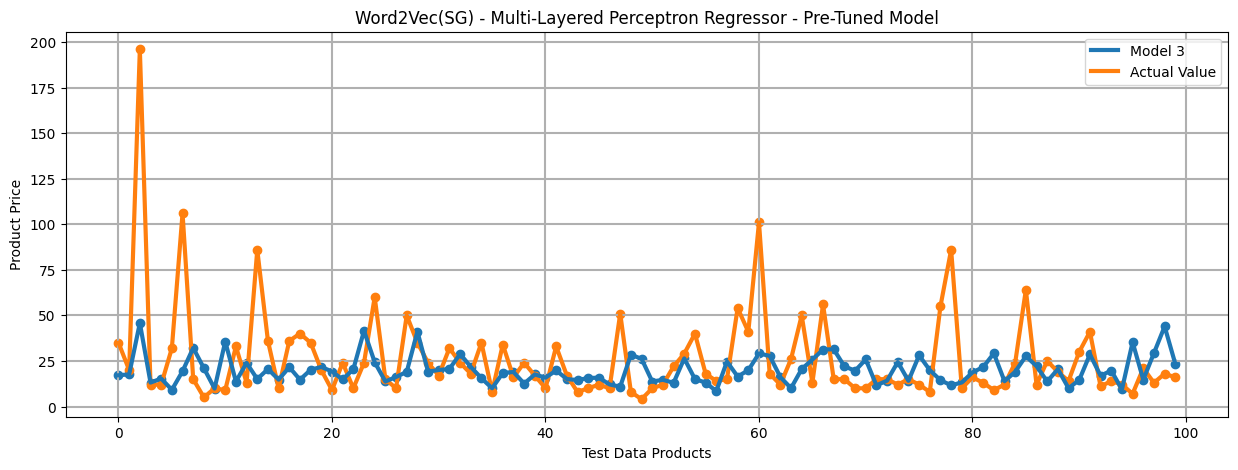

In [120]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

plt.grid(True, linewidth=1.5, which='both')
x= [i for i in range(100)]
plt.scatter(x, y3[:100])
plt.scatter(x, y_test_m2[:100])
plt.plot(x, y3[:100], label='Model 3', zorder=3)
plt.plot(x, y_test_m2[:100], label='Actual Value')

# Customize the plot
plt.title("Word2Vec(SG) - Multi-Layered Perceptron Regressor - Pre-Tuned Model")
plt.xlabel("Test Data Products")
plt.ylabel("Product Price")
plt.legend()

# Display the plot
plt.show()


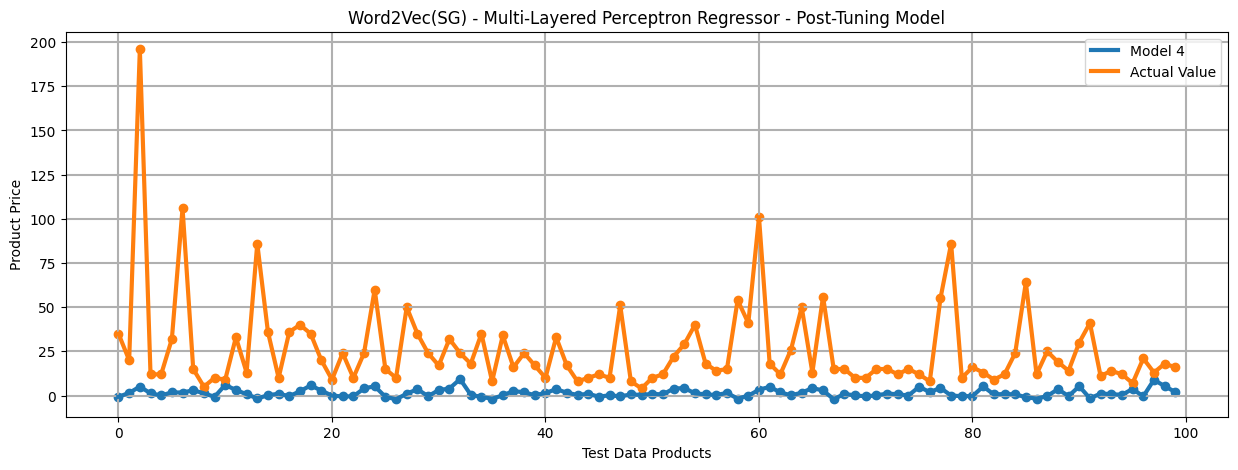

In [122]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

plt.grid(True, linewidth=1.5, which='both')
x= [i for i in range(100)]
plt.scatter(x, y4[:100])
plt.scatter(x, y_test_m2[:100])
plt.plot(x, y4[:100], label='Model 4', zorder=3)
plt.plot(x, y_test_m2[:100], label='Actual Value')

# Customize the plot
plt.title("Word2Vec(SG) - Multi-Layered Perceptron Regressor - Post-Tuning Model")
plt.xlabel("Test Data Products")
plt.ylabel("Product Price")
plt.legend()

# Display the plot
plt.show()
